In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy
import numpy as np
from scipy.stats import linregress

# Import the API keys from api_keys.py
from api_keys import weather_api_key, geoapify_key

In [2]:
# Generate random latitude and longitude combinations
lat_lngs = []
lats = np.random.uniform(-90.0, 90.0, size=1500)
lngs = np.random.uniform(-180.0, 180.0, size=1500)
lat_lngs = zip(lats, lngs)

# Use the citipy library to find the nearest city for each latitude and longitude combination
cities = []
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)

print(f"Generated {len(cities)} unique cities.")

Generated 585 unique cities.


In [3]:
# Set up the base URL and query parameters
url = "http://api.openweathermap.org/data/2.5/weather"
units = "metric"

# Create lists to hold the data
city_data = []
count = 0
print_interval = 100  # Print status every 100 cities

# Loop through the cities and request weather data
for city in cities:
    try:
        params = {"q": city, "appid": weather_api_key, "units": units}
        response = requests.get(url, params=params).json()

        # Parse the JSON response and store the data
        city_data.append({
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })

        # Increment the count and print status at intervals
        count += 1
        if count % print_interval == 0:
            print(f"Processed {count} cities...")

    except KeyError:
        # Handle cases where the city is not found
        continue

# Convert the list of dictionaries into a DataFrame
city_data_df = pd.DataFrame(city_data)
print(f"Total cities processed: {len(city_data_df)}")
city_data_df.head()

Processed 100 cities...
Processed 200 cities...
Processed 300 cities...
Processed 400 cities...
Processed 500 cities...
Total cities processed: 562


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,7.84,86,83,0.68,CL,1724271871
1,constantia,44.1833,28.6500,23.38,71,81,2.49,RO,1724271871
2,yeniseysk,58.4497,92.1703,13.32,99,62,2.45,RU,1724271617
3,susuman,62.7833,148.1667,6.24,83,41,1.39,RU,1724271872
4,aanekoski,62.6946,25.8180,14.36,100,6,2.14,FI,1724271872


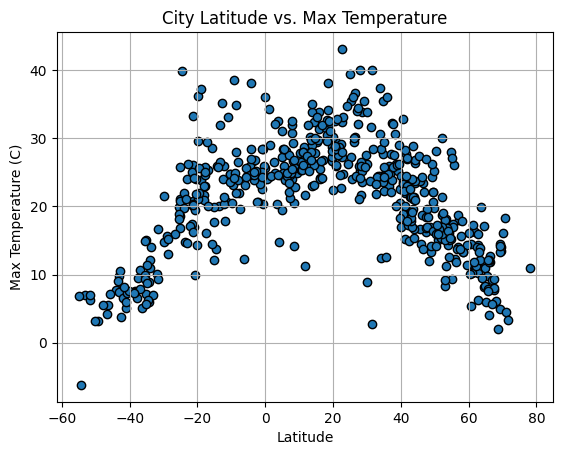

In [4]:
# Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.show()

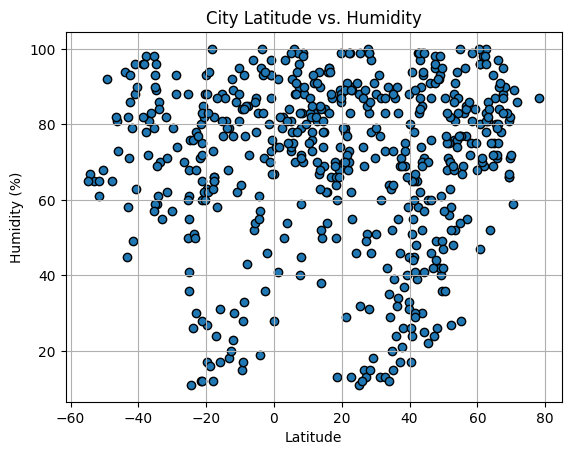

In [5]:
# Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

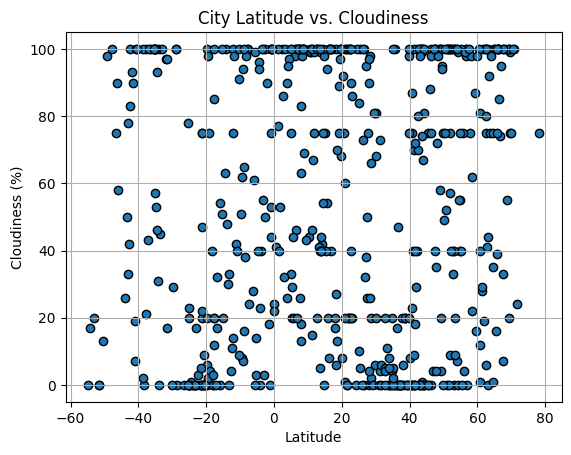

In [6]:
# Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

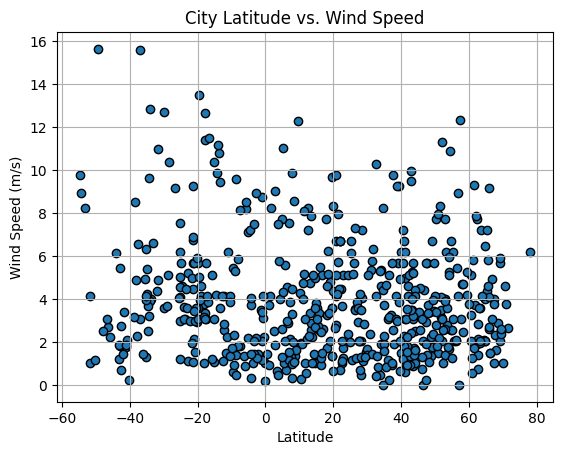

In [7]:
# Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()

In [8]:
# Function to create linear regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values)+5, max(y_values)-5), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    print(f"r-squared: {rvalue**2}")


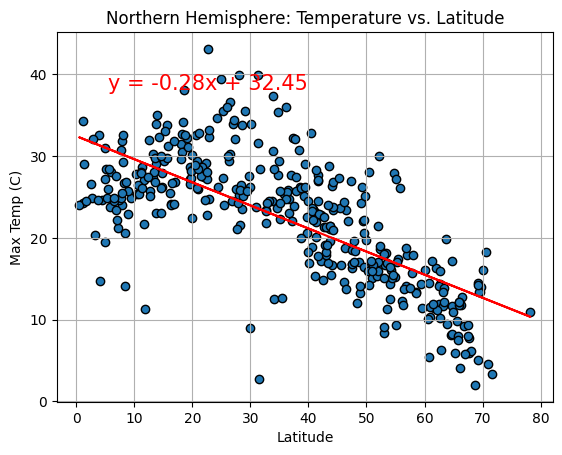

r-squared: 0.5066290905619253


In [9]:
# Northern Hemisphere - Temperature vs. Latitude
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]
plot_linear_regression(northern_hemi["Lat"], northern_hemi["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temp (C)")

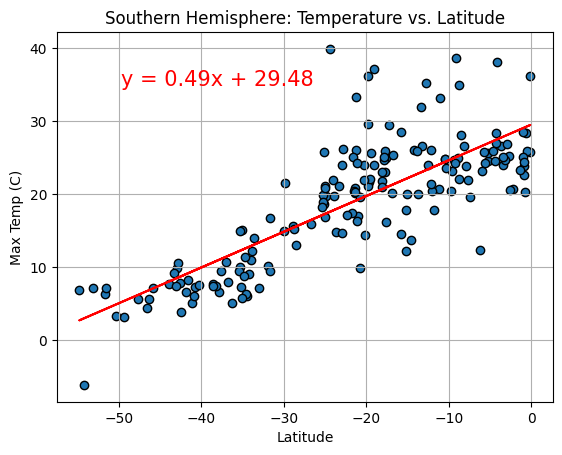

r-squared: 0.6375788441648235


In [10]:
# Southern Hemisphere - Temperature vs. Latitude
plot_linear_regression(southern_hemi["Lat"], southern_hemi["Max Temp"], 
                       "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temp (C)")

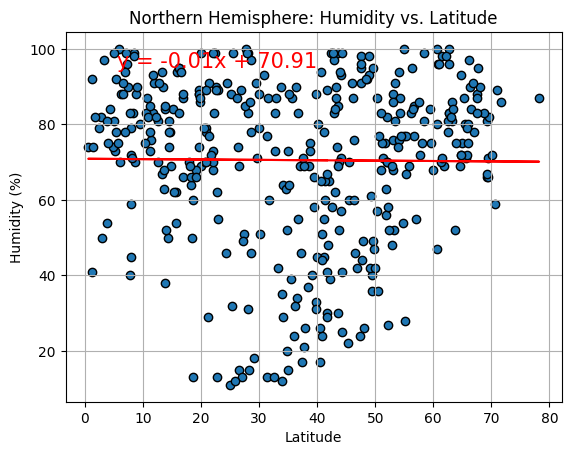

r-squared: 7.70238804028322e-05


In [11]:
# Northern Hemisphere - Humidity vs. Latitude
plot_linear_regression(northern_hemi["Lat"], northern_hemi["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

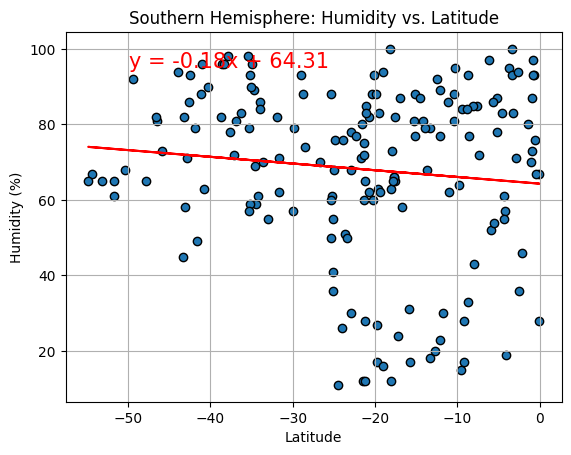

r-squared: 0.011995484844271646


In [12]:
# Southern Hemisphere - Humidity vs. Latitude
plot_linear_regression(southern_hemi["Lat"], southern_hemi["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

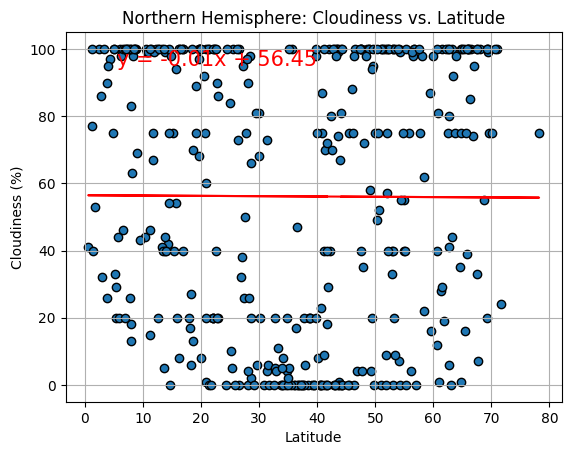

r-squared: 1.9749220560762718e-05


In [13]:
# Northern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(northern_hemi["Lat"], northern_hemi["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

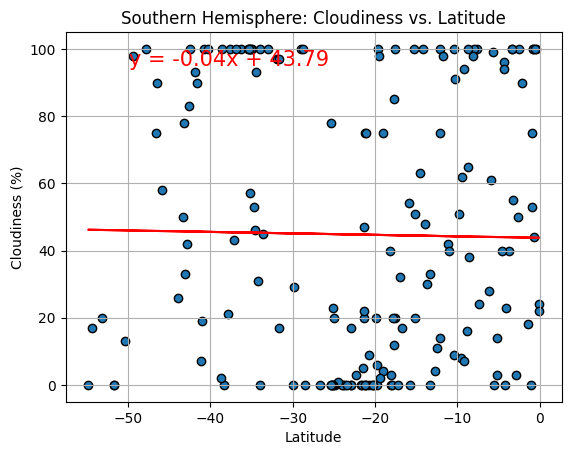

r-squared: 0.00023936706381622592


In [14]:
# Southern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(southern_hemi["Lat"], southern_hemi["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

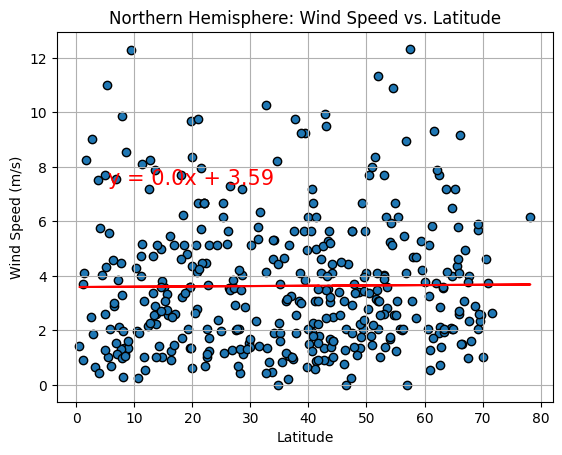

r-squared: 9.14088400743145e-05


In [15]:
# Northern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(northern_hemi["Lat"], northern_hemi["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")

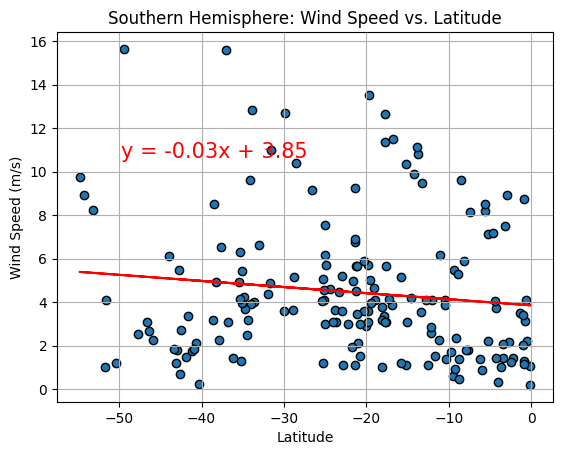

r-squared: 0.015204873586776522


In [16]:
# Southern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(southern_hemi["Lat"], southern_hemi["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")